In [3]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10,7)
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import initializers

In [19]:
stars = pd.read_csv("stars.csv")
dwarfs = stars[(stars["Star type"]==1) | (stars["Star type"]==2) ]
dwarfs.head() # Gets first 5 entries
# print(dwarfs)

,Temperature(K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
10,3600,0.0029,0.5100,10.690,1,Red,M
11,3129,0.0122,0.3761,11.790,1,Red,M
12,3134,0.0004,0.1960,13.210,1,Red,M
13,3628,0.0055,0.3930,10.480,1,Red,M
14,2650,0.0006,0.1400,11.782,1,Red,M


In [5]:
X = dwarfs[["Temperature(K)","Radius(R/Ro)"]].values
y = dwarfs[["Star type"]].values
yl = LabelEncoder().fit_transform(y.flatten())

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,yl, test_size=0.2, random_state=42)
# y_test

(0.0, 25000.0)

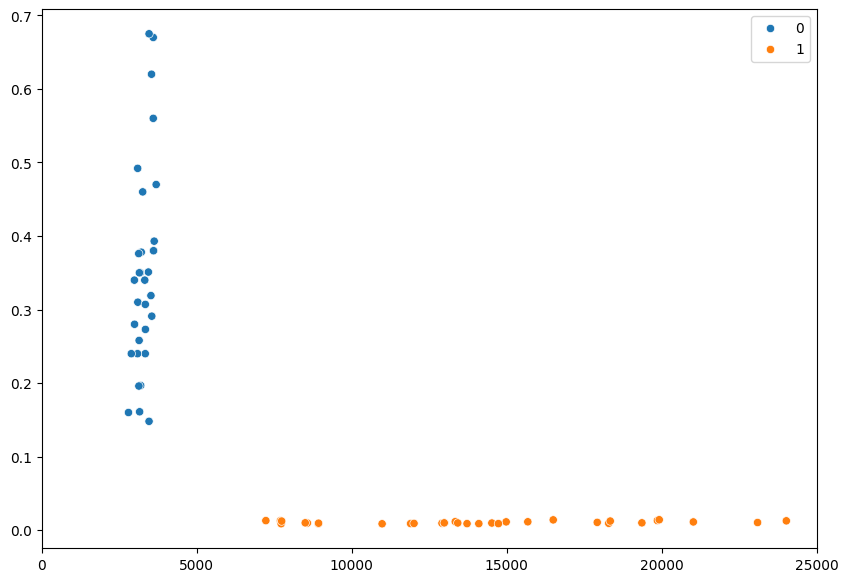

In [7]:
sns.scatterplot(x=X_train[:,0],y=X_train[:,1],hue=y_train)
plt.xlim(0,25000)

In [8]:
# define the model
model = Sequential()
model.add(Dense(1, activation='leaky_relu', kernel_initializer='he_normal', input_shape=(2,)))
#model.add(Dense(4, activation='leaky_relu', kernel_initializer='he_normal'))
model.add(Dense(2, activation='softmax'))

c:\Users\broth\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
# tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7 (28.00 B)

 Trainable params: 7 (28.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.fit(X_train, y_train, epochs=1000, batch_size=30, verbose=0)

In [11]:
loss,acc = model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 1.0000 - loss: 0.1855


3125/3125 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


(-1.0, 1.0)

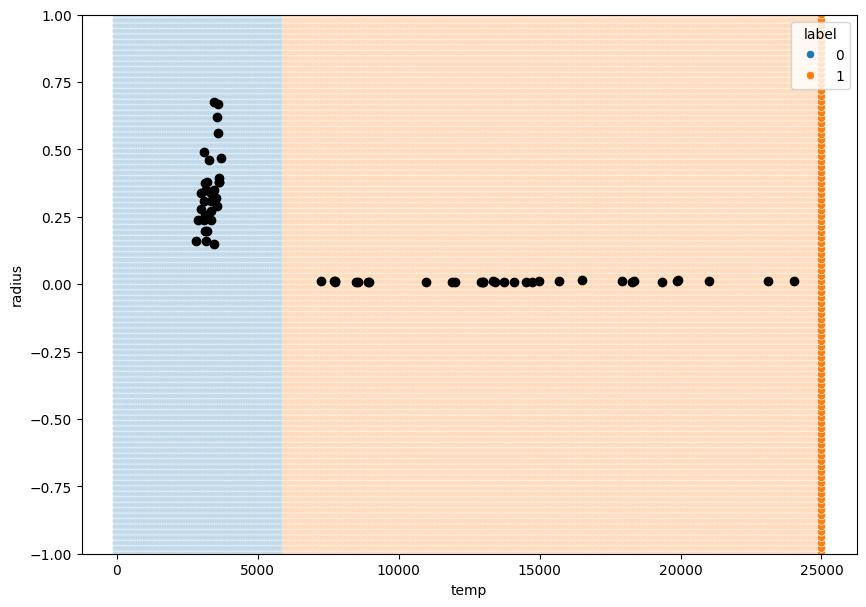

In [12]:
# Plot the decision boundary
temp = np.linspace(0,25000,1000)
radius = np.linspace(-1,1,100)
from itertools import product
randomdata = np.array(list(product(temp,radius)))
g = model.predict(randomdata)
db=pd.DataFrame({"temp":randomdata[:,0],"radius":randomdata[:,1],"label":list(map(np.argmax,g)) })
X_train,X_test,y_train,y_test = train_test_split(X,yl, test_size=0.2,random_state=42)
sns.scatterplot(data=db,x="temp",y="radius",hue="label")
plt.scatter(X_train[:,0],X_train[:,1],color="black")
#plt.xlim(0,5000)
plt.ylim(-1,1)